In [ ]:
"""
!git clone -b EMT https://github.com/pop756/Quantum_KAN.git
%cd Quantum_KAN
!pip install -r requirements.txt"""

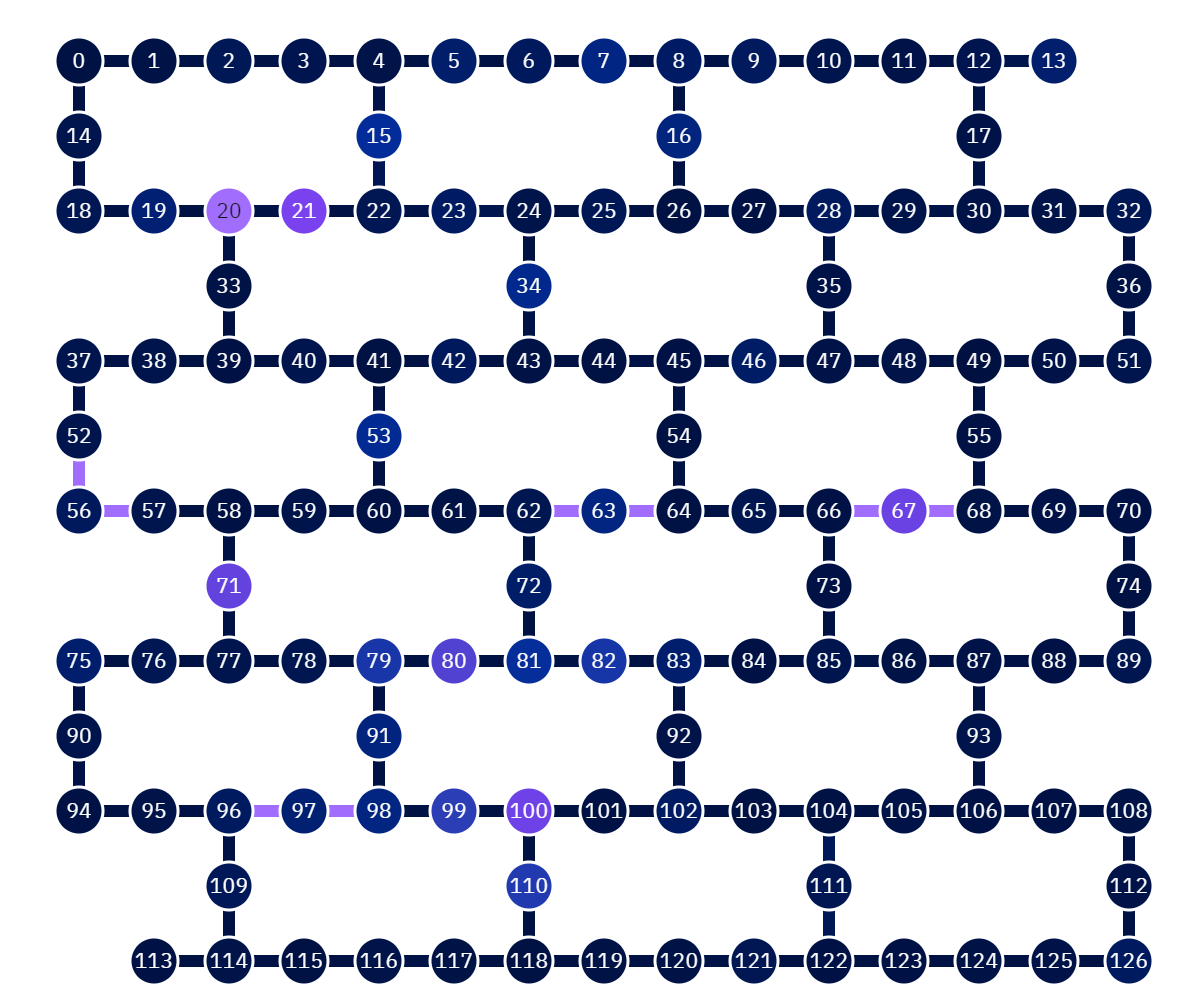


사용할것 : 37~43

In [214]:
# Initialize your account
from qiskit_ibm_runtime import QiskitRuntimeService
import qiskit_ibm_provider
from qiskit_aer import AerSimulator
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')

backend_name = 'ibm_kyiv'
backend_error = service.backend(backend_name)

In [215]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian


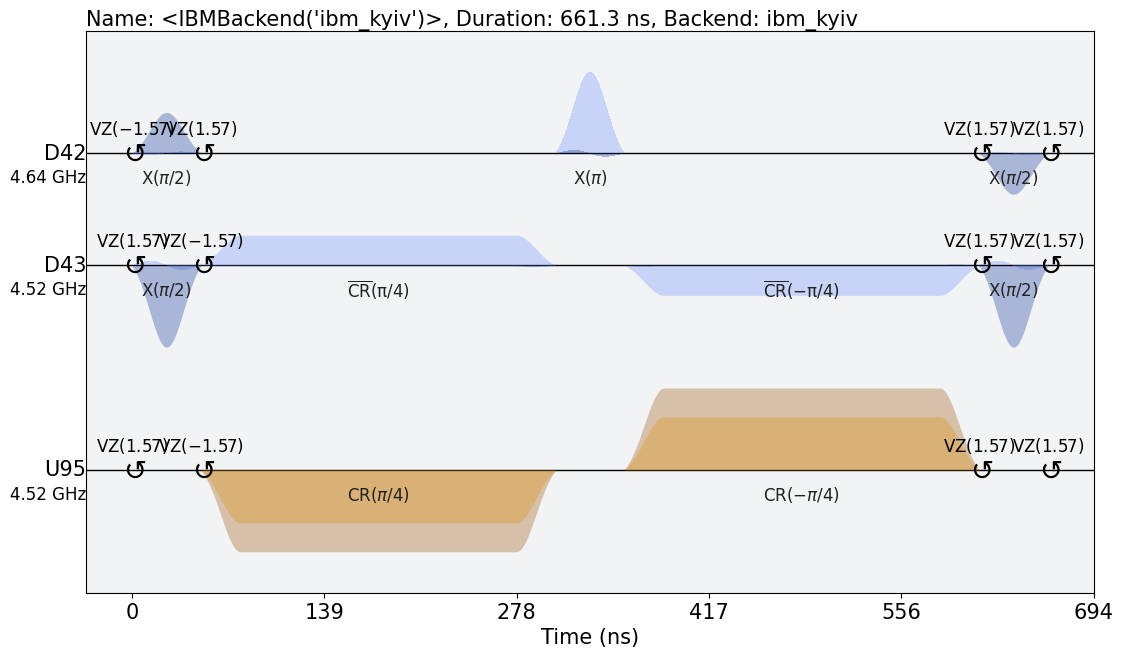

In [216]:
from qiskit import QuantumCircuit
from qiskit import pulse
from qiskit import schedule
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Options
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=[43, 42])


qubit_use = [37,38,39,40,41,42,43]
circ = QuantumCircuit(2, 2)
circ.ecr(0, 1)
from qiskit import transpile
circ = passmanager.run(circ,backend_error)
pulse_schedule = schedule(circ,backend=backend_error)
pulse_schedule.draw(backend=backend_error)

In [217]:
init_list = []
for item in backend_error.target['ecr']:
    if item[0] in qubit_use and item[1] in qubit_use:
        init_list.append(item)

In [218]:
import copy
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit.circuit import QuantumCircuit, Gate
from qiskit.pulse import builder, DriveChannel
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2,SamplerV2

l = 1
init = '11'



qc1 = QuantumCircuit(2, 2)
if init[0] == '1':
  qc1.x(0)
if init[1] == '1':
  qc1.x(1)
qc1.ecr(0,1)
qc1.ecr(0,1)
qc1.measure(0,0)
qc1.measure(1,1)

def update_ecr(l,initial_layout,backend):
  custom_gate = Gate(f"error", 2, [])
  pulse_schedule = backend.target['ecr'][initial_layout].calibration
  pulse_copy = copy.deepcopy(pulse_schedule)
  with pulse.build(backend, name=f'ecr_err_0_1_{l}') as my_schedule:
      index=0
      for pul in pulse_copy.instructions:
          if index == 0:
            duration = int(round(pul[1].pulse.duration*l/16)*16)
            width = int(pul[1].pulse._params['width']*l)
            x_duration = int(round(pulse_copy.instructions[2][1].pulse.duration/16)*16)
            sigma = int(pul[1].pulse._params['sigma']*l)
            
            
          

          try:
            pul[1].pulse._params['width']
            pul[1].pulse.duration = duration
            pul[1].pulse._params['sigma'] = sigma
            pul[1].pulse._params['width'] = width
            pulse.play(pul[1].pulse,pul[1].channel)
            if index<2:
              pulse.delay(x_duration,pul[1].channel)
            index+=1
          except:
            pass
  try:
    backend.target.add_instruction(
        custom_gate,
        {initial_layout: InstructionProperties(calibration=my_schedule)},
    )
  except:
    backend.target.update_instruction_properties(f'error',initial_layout,properties = InstructionProperties(calibration=my_schedule))
  #backend.target.update_instruction_properties('ecr_err_0_1',(0,1),properties = InstructionProperties(calibration=my_schedule))
  # Re-generate the passmanager with the new backend target
  return my_schedule
for initial_layout in init_list:
  my_schedule = update_ecr(l,initial_layout,backend_error)
initial_layout = init_list[1]
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend_error, initial_layout=list(initial_layout))
qc1 = passmanager.run(qc1)


KeyError: "Provided qarg: '(40, 39)' not in this Target for error"

In [213]:
init_list

[(37, 38), (40, 39), (42, 41), (39, 38), (40, 41), (42, 43)]

In [212]:
backend_error.target._gate_map

{'id': {(0,): InstructionProperties(duration=4.977777777777777e-08, error=0.00014557766911417092, calibration=Schedule id),
  (1,): InstructionProperties(duration=4.977777777777777e-08, error=0.00013026608880920245, calibration=Schedule id),
  (2,): InstructionProperties(duration=4.977777777777777e-08, error=0.00020357456024059462, calibration=Schedule id),
  (3,): InstructionProperties(duration=4.977777777777777e-08, error=0.00019501726968296492, calibration=Schedule id),
  (4,): InstructionProperties(duration=4.977777777777777e-08, error=0.0005906391132975891, calibration=Schedule id),
  (5,): InstructionProperties(duration=4.977777777777777e-08, error=0.00017431840815491028, calibration=Schedule id),
  (6,): InstructionProperties(duration=4.977777777777777e-08, error=0.00012192776699681753, calibration=Schedule id),
  (7,): InstructionProperties(duration=4.977777777777777e-08, error=0.00011554148988753692, calibration=Schedule id),
  (8,): InstructionProperties(duration=4.9777777777

In [202]:
initial_layout

(40, 39)

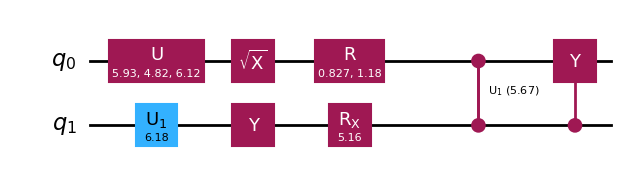

In [191]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(2, 5, measure=False)
circ.draw(output='mpl')

In [178]:
qc_list = []
for i in range(20):
    qc1 = QuantumCircuit(2, 2)
    if init[0] == '1':
        qc1.x(0)
    if init[1] == '1':
        qc1.x(1)
    #qc1.ecr(0,1)
    #qc1.ecr(0,1)
    for j in range(i):
        qc1.ecr(0,1)
        qc1.ecr(0,1)
    qc1.measure(0,0)
    qc1.measure(1,1)
    qc1 = passmanager.run(qc1)
    qc_list.append(qc1)
    

sampler = SamplerV2(backend=backend_error)
job = sampler.run(qc_list,shots=8000)
job.update_tags(["ecr_echo",init,str(initial_layout),f"l={l}"])

['(40, 39)', '11', 'ecr_echo', 'l=1']

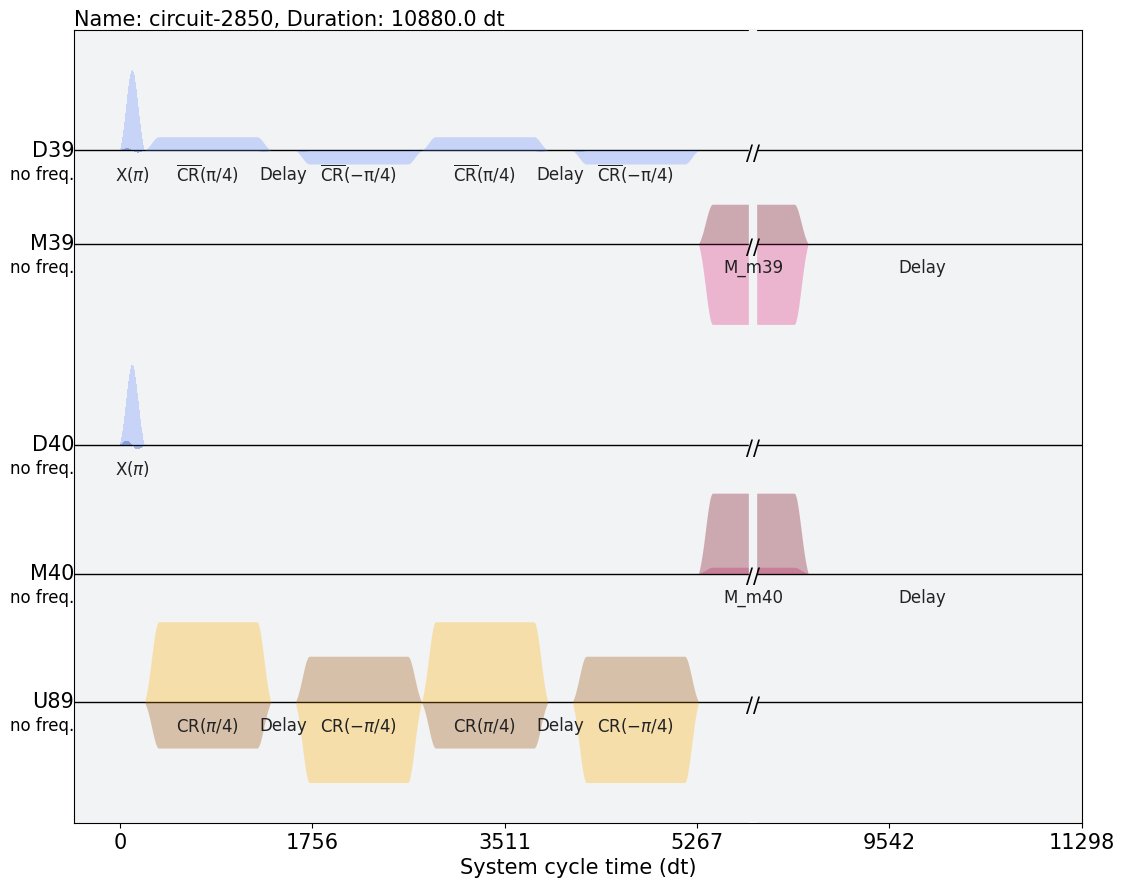

In [179]:
schedule(qc_list[0],backend=backend_error).draw()

In [180]:
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')


backend = service.backend(backend_name)

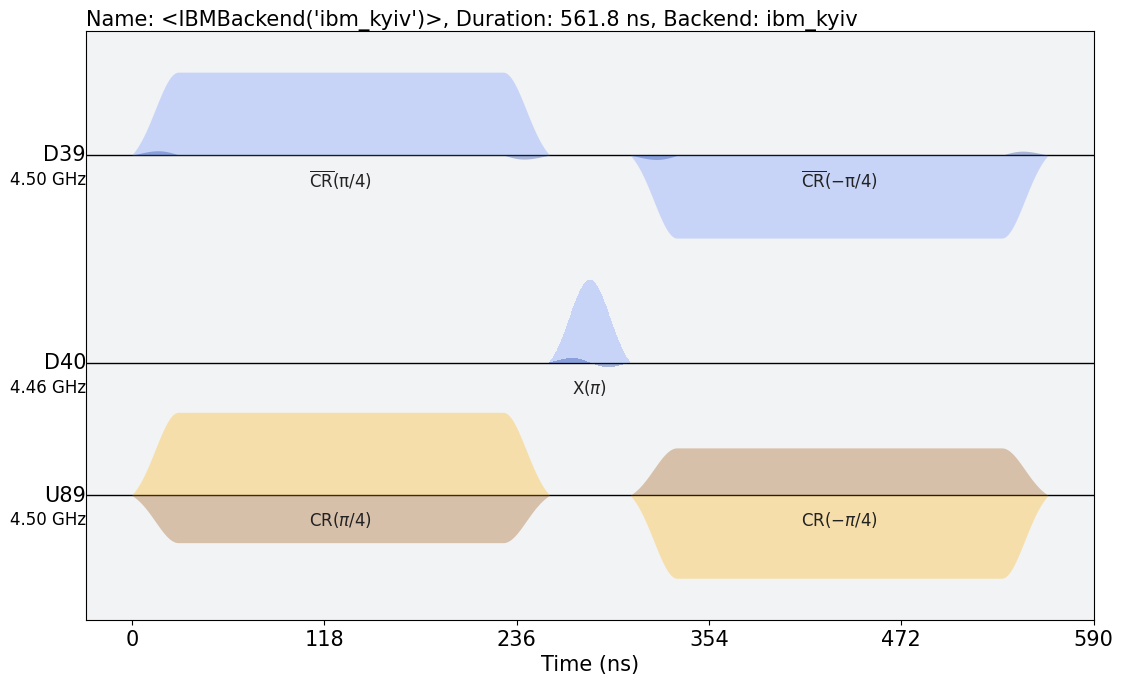

In [181]:
passmanager = generate_preset_pass_manager(optimization_level=0, backend=backend, initial_layout=list(initial_layout))


qubit_use = [37,38,39,40,41,42,43]
circ = QuantumCircuit(2, 2)
circ.ecr(0, 1)
from qiskit import transpile
circ = passmanager.run(circ,backend)
pulse_schedule = schedule(circ,backend=backend)
pulse_schedule.draw(backend=backend)

In [182]:
qc_list = []
for i in range(20):
    qc1 = QuantumCircuit(2, 2)
    if init[0] == '1':
        qc1.x(0)
    if init[1] == '1':
        qc1.x(1)
    #qc1.ecr(0,1)
    #qc1.ecr(0,1)
    for j in range(i):
        qc1.ecr(0,1)
        qc1.ecr(0,1)
    qc1.measure(0,0)
    qc1.measure(1,1)
    qc1 = passmanager.run(qc1)
    qc_list.append(qc1)
    

sampler = SamplerV2(backend=backend)
job = sampler.run(qc_list,shots=8000)
job.update_tags(["ecr",init,str(initial_layout)])

['(40, 39)', '11', 'ecr']

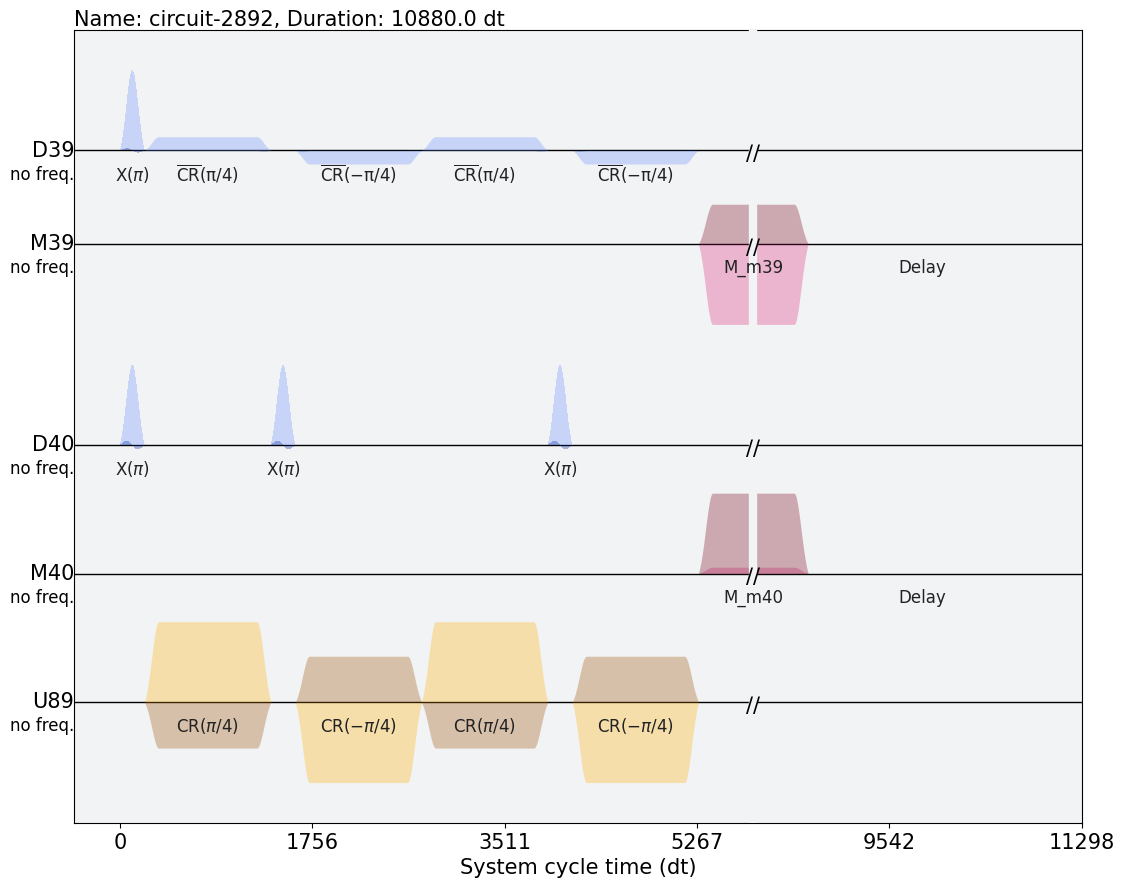

In [183]:
schedule(qc_list[0],backend=backend).draw()

In [154]:
import pennylane as qml
from pennylane import numpy as np



# 2 큐빗 양자 회로를 시뮬레이션할 디바이스 설정

dev = qml.device('default.qubit', wires=2)


# 양자 회로 정의
@qml.qnode(dev)
def circuit():
        
    qml.ECR(wires=[1, 0])
    
    return qml.expval(qml.PauliY(0)+qml.PauliZ(1))

# 회로 실행 및 기댓값 출력
expectation_value = circuit()
print(f"Expectation value: {expectation_value}")


Expectation value: -1.9999999999999993


In [299]:
jobs = service.jobs()

In [301]:
for job in jobs[:2]:
    job.inputs['circuits'][3].draw(idle_wires=False)

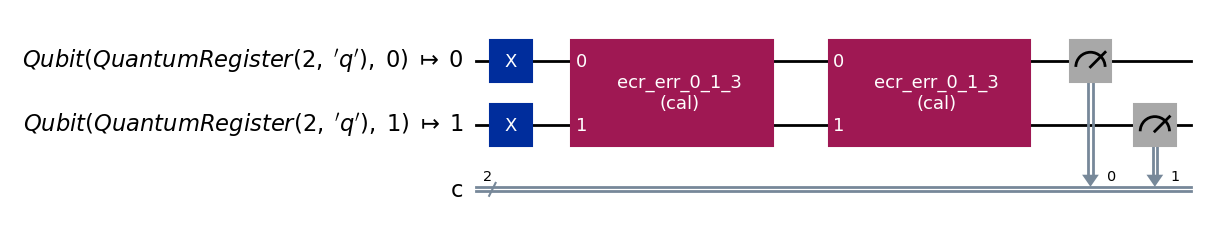

In [131]:
job.inputs['circuits'][1].draw('mpl',idle_wires=False)